# Selecting the response variable
To understand how economic crises affect a bank’s financial stability, it is important to choose a key financial metric as a response variable that is both vital for a bank’s health and significantly impacted during downturns. Several options were considered, including income and loss components, capital ratios, and liquidity measures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
from sample_panel.filtering import bank_filtering
from sample_panel.response_var import response_variables
from EDA.panel_vis import plot_response_var

## Loading Data

In [3]:
import os
print(os.getcwd())

C:\temp\Project


In [4]:
bank_panel_df = pd.read_csv('df_bank_panel.csv',low_memory=False)

## Preparing Sample

In [5]:
# Select banks that meet the eligibility criteria
bank_panel_df = bank_filtering(bank_panel_df)

In [6]:
print(bank_panel_df)

       Unnamed: 0 Report Date   IDRSSD  \
0           60866  2002-12-31    12311   
1           60881  2002-12-31    14409   
2           60899  2002-12-31    17147   
3           60945  2002-12-31    23504   
4           60994  2002-12-31    30810   
...           ...         ...      ...   
18166      639874  2024-09-30  3637685   
18167      639878  2024-09-30  3650808   
18168      639894  2024-09-30  3783313   
18169      639911  2024-09-30  3938186   
18170      639934  2024-09-30  5278251   

                       Financial Institution Name  RCFN2200   RCON3210  \
0                   HUNTINGTON NATIONAL BANK, THE  965568.0        NaN   
1                  CITIZENS BANK OF MASSACHUSETTS  178402.0        NaN   
2      FIRST MERCHANTS BANK, NATIONAL ASSOCIATION       NaN    66496.0   
3                BRIDGEHAMPTON NATIONAL BANK, THE       NaN    39825.0   
4                                   DISCOVER BANK       NaN  3188286.0   
...                                           ...  

In [7]:
print(bank_panel_df.columns)

Index(['Unnamed: 0', 'Report Date', 'IDRSSD', 'Financial Institution Name',
       'RCFN2200', 'RCON3210', 'RCFD3300', 'RCFD2948', 'RCFD2170', 'RIAD4074',
       'RIAD4079', 'RIAD4073', 'RIAD4107', 'RIAD4301', 'RIAD4300', 'RIAD4093',
       'RIAD4230', 'RIADJJ33', 'UBPR3545', 'UBPR2200', 'UBPR2170', 'UBPR3300',
       'UBPRD486', 'UBPRE006', 'UBPRD488', 'UBPRE017', 'UBPRE002', 'UBPRE009',
       'UBPRE001', 'UBPRE010', 'UBPRE016', 'UBPRE003', 'UBPRE019', 'UBPRE005',
       'UBPRE007', 'UBPRE004', 'UBPRD659', 'UBPRE013', 'UBPRKW07', 'UBPR7414',
       'UBPRE018', 'UBPRE591', 'UBPRE600', 'UBPRE599', 'UBPRE598', 'UBPRPG64'],
      dtype='object')


In [8]:
# Select potential options for the response variable
bank_panel_df = response_variables(bank_panel_df)

In [9]:
bank_panel_df.tail(5)

,Report Date,IDRSSD,Financial Institution Name,Provision for Loan Lease Losses as % of Aver. Assets,Provision_quarter as % of Assets,Net Interest Income as % of Aver. Assets,Noninterest Income as % of Aver. Assets,Pre Provision Net Revenue as % of Aver. Assets,Tier One Leverage Capital,Total Risk-Based Capital to Risk-Weighted Assets,Core Deposits as % of Total Assets,Short Term Assets as % of Short Term Liabilities,Net Short Term Liabilities as % of Total Assets,Net Loans Leases as % of Total Deposits,RIADJJ33,RIADJJ33,UBPR2170,UBPRD659
18166,2024-09-30,3637685,FIRST FOUNDATION BANK,0.01,0.008418,1.41,-1.06,-1.132054,8.6533,13.8135,48.33,189.29,-11.83,95.22,52.0,52.0,13351881.0,13285349.0
18167,2024-09-30,3650808,LIVE OAK BANKING COMPANY,0.64,1.101798,3.21,0.95,1.664800,8.3896,12.4250,59.30,29.07,23.88,87.35,63537.0,63537.0,12525707.0,11694218.0
18168,2024-09-30,3783313,CROSS RIVER BANK,0.69,0.211637,5.26,0.23,0.814352,12.2817,NaN,38.25,90.29,2.48,85.66,27749.0,27749.0,8437074.0,8791615.0
18169,2024-09-30,3938186,"BANKUNITED, NATIONAL ASSOCIATION",0.17,0.103451,2.67,0.26,1.198152,9.5854,14.5539,62.64,55.28,9.88,85.73,44071.0,44071.0,35758118.0,35809045.0
18170,2024-09-30,5278251,CHARLES SCHWAB TRUST BANK,0.00,0.000000,1.94,1.13,2.132853,14.4583,98.1073,90.19,NaN,-14.37,0.00,0.0,0.0,9622859.0,10297257.0


In [10]:
bank_panel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18171 entries, 0 to 18170
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Report Date                                           18171 non-null  object 
 1   IDRSSD                                                18171 non-null  int64  
 2   Financial Institution Name                            17353 non-null  object 
 3   Provision for Loan Lease Losses as % of Aver. Assets  18171 non-null  float64
 4   Provision_quarter as % of Assets                      4302 non-null   float64
 5   Net Interest Income as % of Aver. Assets              18171 non-null  float64
 6   Noninterest Income as % of Aver. Assets               18171 non-null  float64
 7   Pre Provision Net Revenue as % of Aver. Assets        18171 non-null  float64
 8   Tier One Leverage Capital                             18

In [11]:
bank_panel_df.to_csv('df_response_vars.csv')

##  Time series plots for potential response variables

### The effect of economic crises on income and expenses

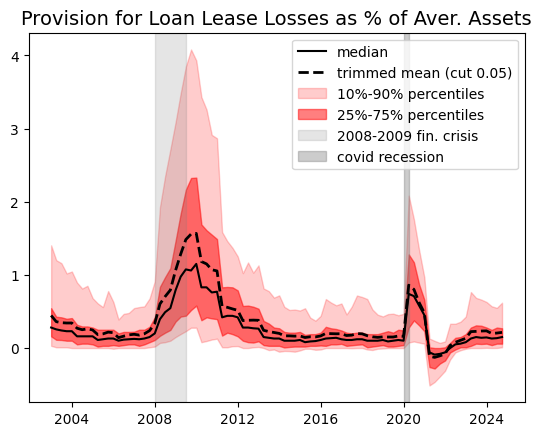

In [12]:
plot_response_var(bank_panel_df, 'Provision for Loan Lease Losses as % of Aver. Assets')

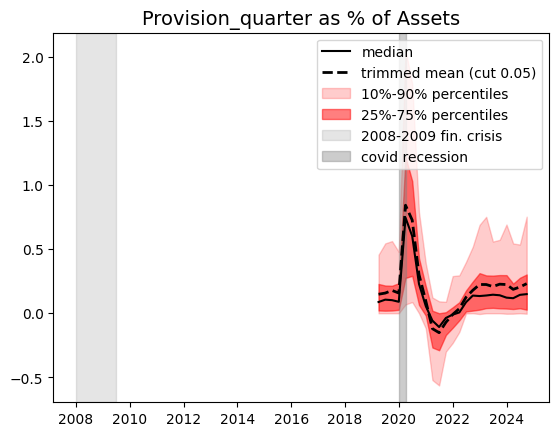

In [13]:
plot_response_var(bank_panel_df, 'Provision_quarter as % of Assets')

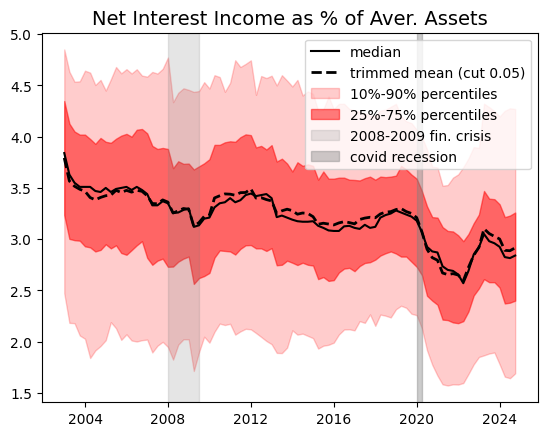

In [14]:
plot_response_var(bank_panel_df, 'Net Interest Income as % of Aver. Assets')

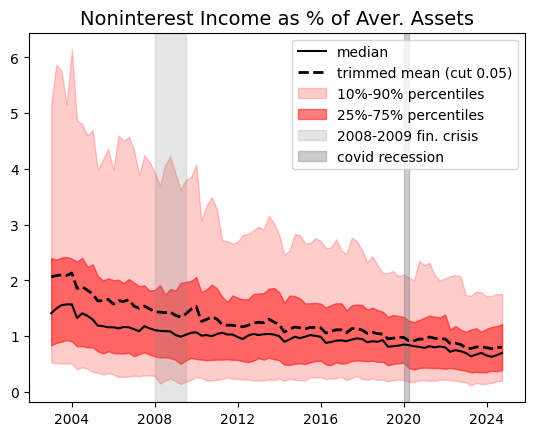

In [15]:
plot_response_var(bank_panel_df, 'Noninterest Income as % of Aver. Assets')

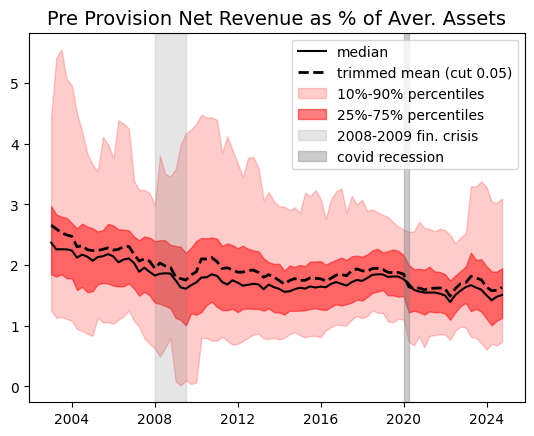

In [16]:
plot_response_var(bank_panel_df, 'Pre Provision Net Revenue as % of Aver. Assets')

### The effect of economic crises on capital ratios

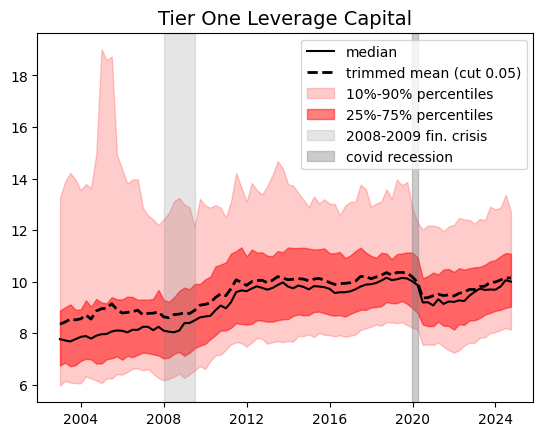

In [17]:
plot_response_var(bank_panel_df, 'Tier One Leverage Capital')

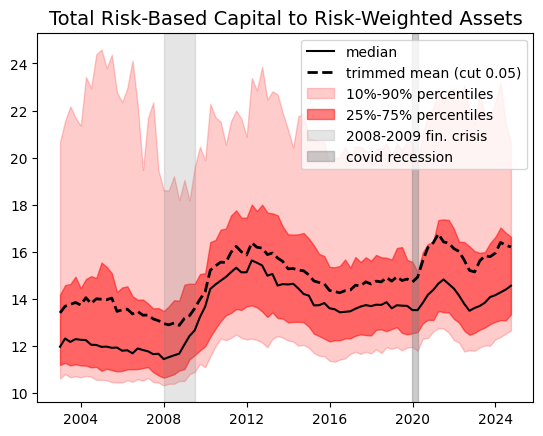

In [18]:
plot_response_var(bank_panel_df, 'Total Risk-Based Capital to Risk-Weighted Assets')

### The effect of economic crises on liquidity

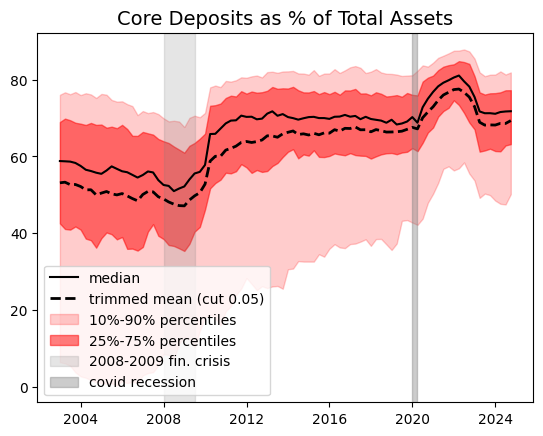

In [19]:
plot_response_var(bank_panel_df, 'Core Deposits as % of Total Assets')

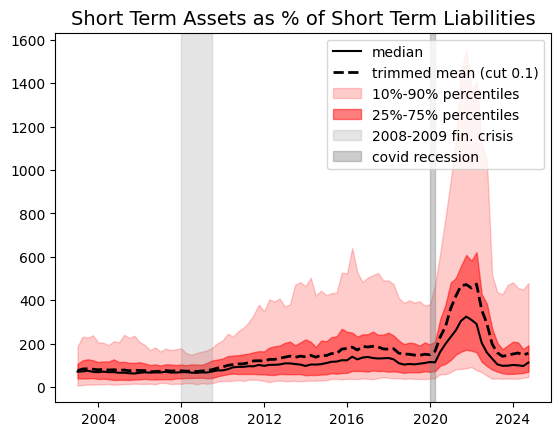

In [20]:
plot_response_var(bank_panel_df, 'Short Term Assets as % of Short Term Liabilities', 0.1)

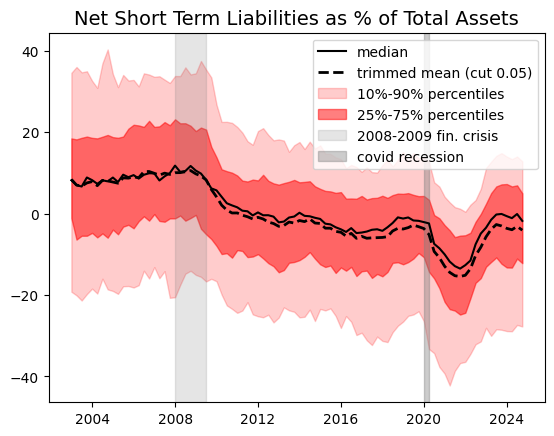

In [21]:
plot_response_var(bank_panel_df, 'Net Short Term Liabilities as % of Total Assets')

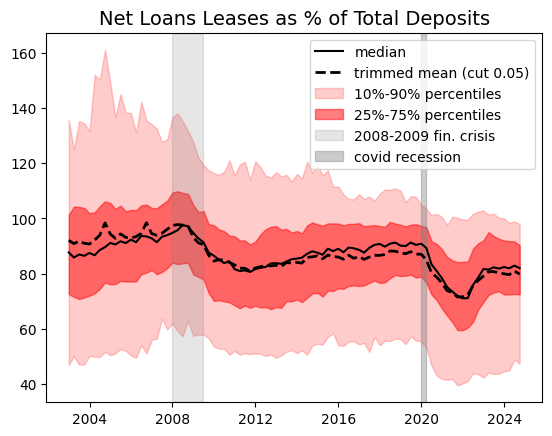

In [22]:
plot_response_var(bank_panel_df, 'Net Loans Leases as % of Total Deposits')

## Provision for Loan Lease Losses as % of Aver. Assets

In [23]:
y_col = 'Provision for Loan Lease Losses as % of Aver. Assets'

In [24]:
bank_panel_df[y_col].describe()

count    18171.000000
mean         0.519415
std          1.329692
min         -4.110000
25%          0.040000
50%          0.170000
75%          0.440000
max         86.770000
Name: Provision for Loan Lease Losses as % of Aver. Assets, dtype: float64

### Outliers

In [25]:
# Check outliers on the test set
bank_panel_df = bank_panel_df[bank_panel_df['Report Date']<='2024-09-30']

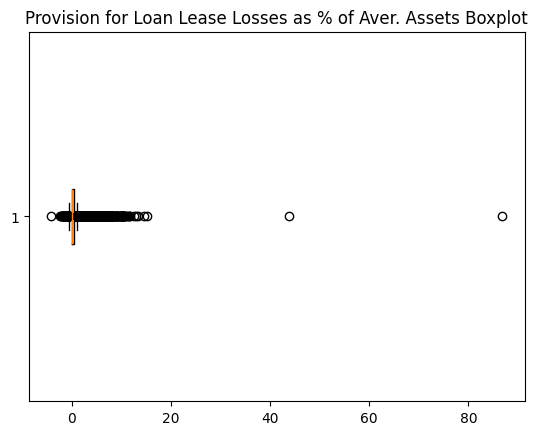

In [26]:
# All points
plt.boxplot(bank_panel_df[y_col], vert=False)
plt.title('Provision for Loan Lease Losses as % of Aver. Assets Boxplot');

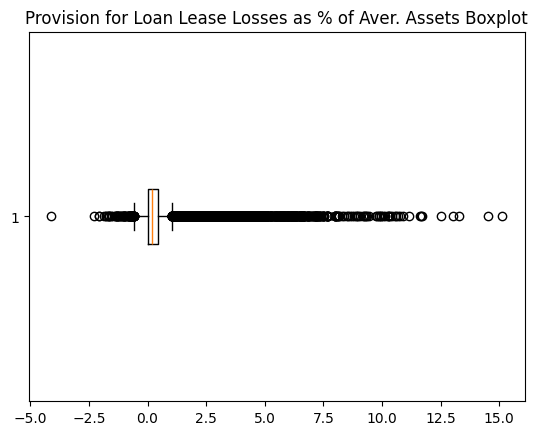

In [27]:
# Removing 2 outliers
plt.boxplot(bank_panel_df.loc[bank_panel_df[y_col]<20, y_col], vert=False)
plt.title('Provision for Loan Lease Losses as % of Aver. Assets Boxplot');

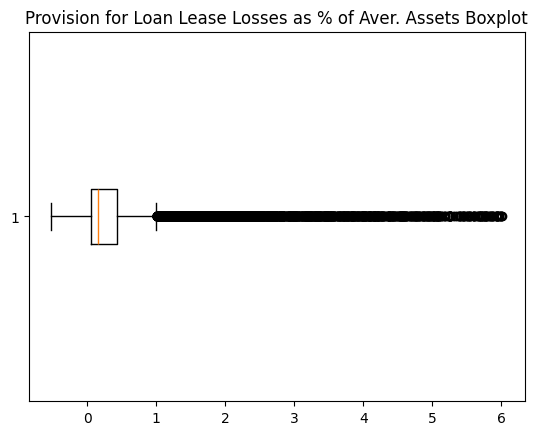

In [28]:
# Removing outliers from both sides
lower_limit = np.percentile(bank_panel_df[y_col], 0.5)
upper_limit = np.percentile(bank_panel_df[y_col], 99)
plt.boxplot(bank_panel_df.loc[(bank_panel_df[y_col]>lower_limit)&\
                              (bank_panel_df[y_col]<upper_limit), y_col], 
            vert=False)
plt.title('Provision for Loan Lease Losses as % of Aver. Assets Boxplot');

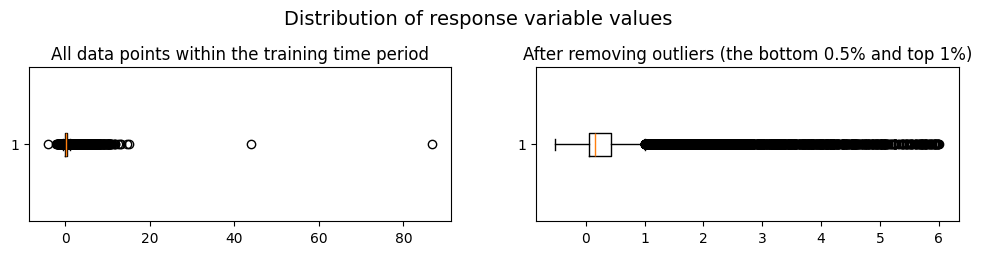

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 2))

ax1.boxplot(bank_panel_df[y_col], vert=False)
ax2.boxplot(bank_panel_df.loc[(bank_panel_df[y_col]>lower_limit)&\
                              (bank_panel_df[y_col]<upper_limit), y_col], 
            vert=False)

ax1.set_title('All data points within the training time period')
ax2.set_title('After removing outliers (the bottom 0.5% and top 1%)')

fig.suptitle('Distribution of response variable values', fontsize=14, y=1.17);